# Part 1 - Data Cleaning
Importing and installing required libraries


In [42]:
# coding: utf-8
# -*- coding: utf-8 -*-
!/usr/bin/env python
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install unidecode
!pip install re
!pip install wordcloud

Python 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
KeyboardInterrupt
>>> Requirement already up-to-date: pip in /resources/common/.virtualenv/python3/lib/python3.5/site-packages (19.0.3)
  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re


In [43]:
import pandas as pd
import numpy as np
import re
import unidecode
import html

# Sklearn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Show plots and tables inline
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

Reading data from US_airline_tweets.csv and generic_tweets.txt files as two different Pandas data frames.

In [44]:
df=pd.read_csv("US_airline_tweets.csv")

In [45]:
gendf=pd.read_csv("generic_tweets.txt")

HTML Character codes are replaced with an ASCII equivalent for both data frames with UNIDECODE and UNESCAPE libraries.

In [46]:
temp1=[]
for i in range(0,len(df)):
    temp1.append(html.unescape(df['text'][i]))
df['text']=temp1
#There are some other non-English characters. The following code can transform those characters to readable one. For example: 'â€œ'--> 'aEURoe'
temp17=[]
for i in range(0,len(df)):
    temp17.append(unidecode.unidecode(df['text'][i]))
df['text']=temp17

In [47]:
temp2=[]
for i in range(0,len(gendf)):
    temp2.append(html.unescape(gendf['text'][i]))
gendf['text']=temp2

temp2=[]
for i in range(0,len(gendf)):
    temp2.append(unidecode.unidecode(gendf['text'][i]))
gendf['text']=temp2

All characters in the text (in the columns which have string) transfrom to lowercase for both data frames.

In [48]:
df['text']=df['text'].str.lower()
df['negative_reason']=df['negative_reason'].str.lower()
df['user']=df['user'].str.lower()

In [49]:
gendf['text']=gendf['text'].str.lower()
gendf['query']=gendf['query'].str.lower()
gendf['user']=gendf['user'].str.lower()

All URLs are removed from both data frames.

In [50]:
temp3=[]
for i in range(0,len(df)):
    temp3.append(re.sub(r'http\S+', '',df['text'][i]))
df['text']=temp3

In [51]:
temp4=[]
for p in range(0,len(gendf)):
    temp4.append(re.sub(r'http\S+', '',gendf['text'][p]))
gendf['text']=temp4

# Part 2 - Exploratory Analysis


In this section, the airline of each tweet is extracted. Based on my observations, the name of airlines are mentioned after '@' in the 'text' column. Thus, I decided to write a code that can extract the words after '@' symbol.
This procedure of finding airline's names has some advantages and disadvantages. The disadvantage of this procedure is that, maybe there are some tweets with more than 2 '@' sign or maybe the word after '@' is not an airline name. For solving this problem, I produced a list of USA airlines to check if the names after '@' is an airline name or not.
The advantage of using this procedure for finding the airline's names is that we can use this code for analyzing data of airline's tweets in other countries except US and we don't have to change anything in our code except the airline list with higher accuracy.

In [52]:
USAairlines=['virginamerica','united','jetblue','americanair','southwestair','usairways','deltaassist','unitedaeur','ninadavuluri']

temp10=[]
for o in range(0,len(df)):
    res = re.findall('@(\w+)',df['text'][o])
    for airlines in res:
        if airlines in USAairlines:
            temp10.append(airlines)
            break
df["Airline's name"]=temp10

In this section, the airline's names will be extracted from tweet text. Having airline's names in tweet texts will decrease the accuracy of extracting feature from text.

In [53]:
def sub_match(str):
  return re.sub('^[^@]*@\w+', '', str)
temp8=[]

for m in range(0,len(df)):
    temp8.append(sub_match(df['text'][m]))
df["text"]=temp8
#there was 2 errors in our raw data which I revised it. one of them was using wrong name for mentioning United Airways and the other one was wrong input data location.
def data_error_correction(string):
    if string == 'unitedaeur':
        return 'united'
    if string == 'ninadavuluri':
        return 'jetblue'
    return string
df["Airline's name"] = df["Airline's name"].apply(data_error_correction)

In this section, I will find the names after '@' and I extracted them from tweet text in our Generic_tweets.txt. If we don't do this, it will decrease the accuracy of extracting da

In [54]:
temp70=[]
for hhhh in range(0,len(gendf)):
    rest = re.findall('@(\w+)',gendf['text'][hhhh])
    temp70.append(rest)
gendf["Mention"]=temp70

temp80=[]
for mm in range(0,len(gendf)):
    temp80.append(sub_match(gendf['text'][mm]))
gendf["text"]=temp80

### Continue of Part 1
In this part, all of the HTML tags and attributes are removed in both data inputs.

In [55]:
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

In [56]:
gendf['text'] = gendf['text'].str.replace(r'[^\w\s]+', '')

In this section, all stop words are removed for Generic_tweets and US_airline_tweets.
The stop word list which is used here are an upgrade version of what is provided for this assignment (stop_words.txt). In this list some words like 'youve', 'its', 'cant', etc are added to the list.

In [57]:
stopwords = open('stop_words2.txt','r').read().split('\n')
temp5=[]
for i in range(0,len(df)):
    temp5.append([x for x in df['text'][i].split() if x not in stopwords])
df['text']=temp5

In [58]:
temp33=[]
for u in range(0,len(gendf)):
    temp33.append([x for x in gendf['text'][u].split() if x not in stopwords])
gendf['text']=temp33

In [59]:
df.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airline's name
0,5.703010e+17,positive,NaN,jnardino,0,"[commercials, experience, tacky]",virginamerica
1,5.703010e+17,negative,bad flight,jnardino,0,"[aggressive, blast, obnoxious, entertainment, ...",virginamerica
2,5.703010e+17,negative,can't tell,jnardino,0,"[big, bad, thing]",virginamerica
3,5.703010e+17,negative,can't tell,jnardino,0,"[seriously, pay, 30, flight, seats, playing, b...",virginamerica
4,5.703010e+17,positive,NaN,cjmcginnis,0,"[time, fly, vx, aeuroeear, wormaeur, wonaeurtmt]",virginamerica


In [60]:
gendf.head()

,class,id,date,query,user,text,Mention
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,no_query,_thespecialone_,"[awww, bummer, shoulda, david, carr, third, day]",[switchfoot]
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,no_query,scotthamilton,"[upset, update, facebook, texting, cry, result...",[]
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,no_query,mattycus,"[dived, times, ball, managed, save, 50, rest, ...",[kenichan]
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,no_query,ellectf,"[body, feels, itchy, fire]",[]
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,no_query,karoli,"[behaving, mad]",[nationwideclass]


## End of Part 1
---------------------------------------------------------------------------------------------------------------

## Continue of Part 2
In this section, the sentiments of US_airline_tweets are categorized into '0' and '1' from 'negative' and 'positive'.

In [61]:
df['sentiment_Category'] = df['sentiment'].map(lambda x: 1 if x=='positive' else 0)
df6=df.groupby("sentiment").sentiment_Category.count()
df6

sentiment
negative    9178
positive    2363
Name: sentiment_Category, dtype: int64

In this section, a pie-chart for the positive and negative sentiments of US_airline_tweets is provided.

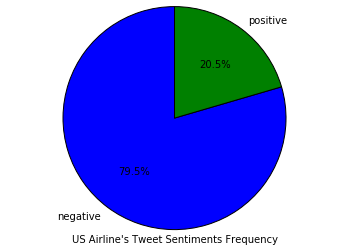

In [62]:
fig6, ax6 = plt.subplots()
ax6.pie(df6, explode=None, labels=df6.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax6.axis('equal')
plt.xlabel("US Airline's Tweet Sentiments Frequency")
plt.show()

#### BONUS - Extra Figures for US_airline_tweets
In this section, I will provide two extra figures to show the retweet count of each airline for US_airline_tweets. 

In [63]:
df["Airline's name"].describe()

count      11541
unique         7
top       united
freq        3124
Name: Airline's name, dtype: object

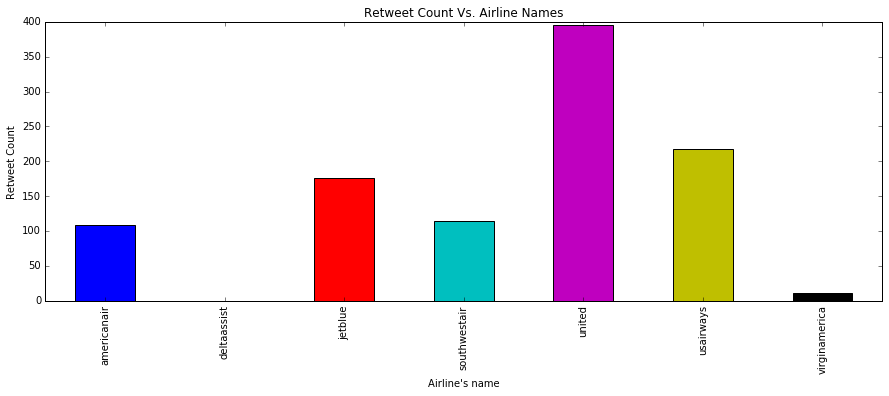

In [64]:
df2=df.groupby("Airline's name").retweet_count.sum()
plt.ylabel('Retweet Count')
df2.plot(kind="bar", figsize=(15,5),title='Retweet Count Vs. Airline Names')

P.S. Deltassist (Delta Airline) had just 2 retweets based on raw data.
The following word cloud shows the frequency of words in the tweets of US_airline_tweets file.

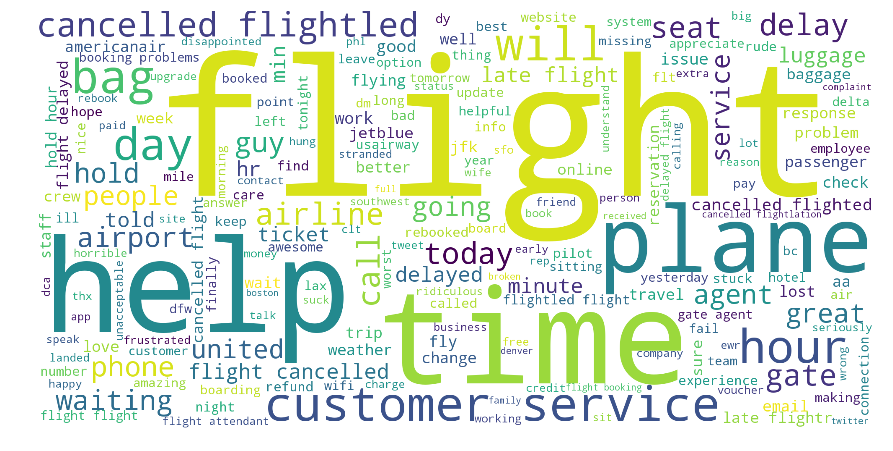

In [65]:
text=[]
from wordcloud import WordCloud
for oo in range(0,len(df)):
    text+=df['text'][oo]
unique_string=(" ").join(text)
wordcloud = WordCloud(width = 2000, height = 1000,background_color ='white').generate(unique_string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

This word cloud for US_airline_tweets shows that the words 'flight', 'help', 'time', and 'plane' have the most frequency.




If we want to find out which airline have the highest number of negative tweets:

In [66]:
neg_data_air = df.iloc[:,[7,6,2]].dropna()
neg_data_air2=neg_data_air.groupby("Airline's name").sentiment_Category.count()
neg_data_air2

Airline's name
americanair      1960
deltaassist         2
jetblue           953
southwestair     1187
united           2632
usairways        2263
virginamerica     181
Name: sentiment_Category, dtype: int64

This result shows that United airways has the highest number of tweets with highest number of negative tweets.

_______________________________________________________________________________________________________


In this section, first I will take out the day of the week which someone tweeted something.

In [67]:
temp74=[]
for hhhhh in range(0,len(gendf)):
    rest = re.findall('\w+',gendf['date'][hhhhh])
    temp74.append(rest)
gendf["Day"]=temp74
temp15=[]
for nnn in range(0,len(gendf)):
    restt=gendf["Day"][nnn][0]
    temp15.append(restt)
gendf["Day"]=temp15

gendf2=gendf[['Day','class']].copy()
gendf2.rename(columns={'class': 'classs'}, inplace=True)
gendf3=gendf2.groupby('Day').classs.sum()
gendf4=gendf2.groupby("Day").mean()

This chart shows that on each day of the week, our tweets have whic class.

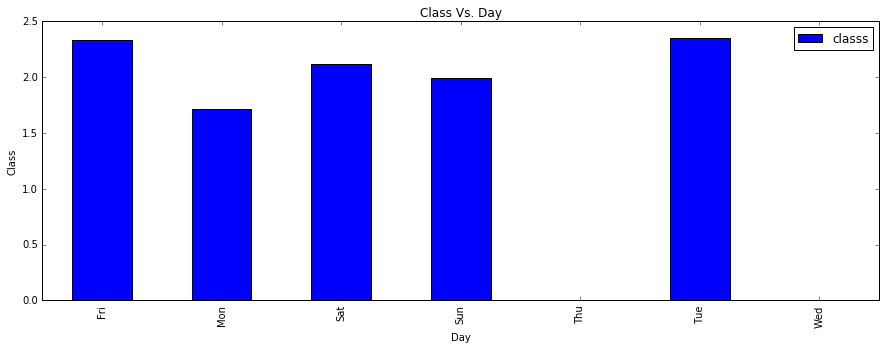

In [68]:
gendf4.plot(kind="bar", figsize=(15,5),title='Class Vs. Day')
plt.ylabel('Class')

This chart shows that we don't have any tweet on Thursdays and Wednesdays during 2 month which our data is collected. Moreover, it shows that on mondays, our tweets has the lowest amount of class which shows that our tweets are not as positive as other days which was predictable!

In [69]:
def add_prop(group):
    retweet_count = group.retweet_count.astype(float)
    group['prop'] = retweet_count / df.retweet_count.sum()
    return group
df = df.groupby(["Airline's name"]).apply(add_prop)

df3=df.groupby("Airline's name").prop.sum()
df3

Airline's name
americanair      0.105779
deltaassist      0.000000
jetblue          0.172380
southwestair     0.111655
united           0.386876
usairways        0.212537
virginamerica    0.010774
Name: prop, dtype: float64

#### BONUS - Extra Figures for Generic_tweets
In this section, I will provide two extra figures to show the tweet frequency in Generic_tweets. 

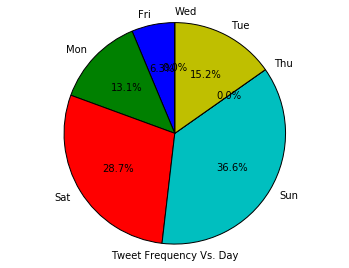

In [70]:
fig2, ax2 = plt.subplots()
ax2.pie(gendf3, explode=None, labels=gendf3.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')
plt.xlabel('Tweet Frequency Vs. Day')
plt.show()

This Pie chart shows that the frequency of tweets are higher on weekend days. Number of tweets are at least two times higher on Saturdays and Sundays in comparison with other days of week during of these 2 months of data that we have.

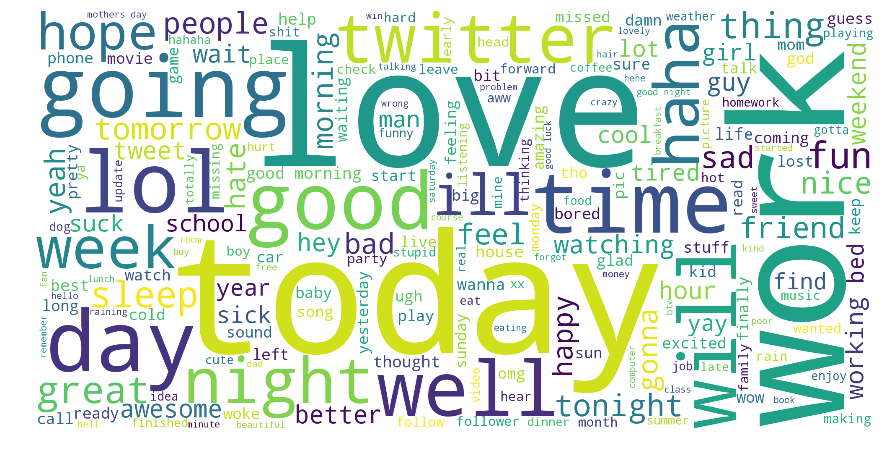

In [71]:
textt=[]
for kk in range(0,len(gendf)):
    textt+=gendf['text'][kk]
    
unique_stringg=(" ").join(textt)
wordcloudd = WordCloud(width = 2000, height = 1000,background_color ='white').generate(unique_stringg)
plt.figure(figsize=(15,15))
plt.imshow(wordcloudd)
plt.axis("off")
plt.show()
plt.close()

This word cloud for Generic_tweets shows that the words 'love', 'work', 'today', and 'lol' have the most frequency.

In [72]:
df['text'] = df['text'].str.join(" ")
gendf['text'] = gendf['text'].str.join(" ")
df.head()

,id,sentiment,negative_reason,user,retweet_count,text,Airline's name,sentiment_Category,prop
0,5.703010e+17,positive,NaN,jnardino,0,commercials experience tacky,virginamerica,1,0.0
1,5.703010e+17,negative,bad flight,jnardino,0,aggressive blast obnoxious entertainment guest...,virginamerica,0,0.0
2,5.703010e+17,negative,can't tell,jnardino,0,big bad thing,virginamerica,0,0.0
3,5.703010e+17,negative,can't tell,jnardino,0,seriously pay 30 flight seats playing bad thin...,virginamerica,0,0.0
4,5.703010e+17,positive,NaN,cjmcginnis,0,time fly vx aeuroeear wormaeur wonaeurtmt,virginamerica,1,0.0


In [73]:
gendf.head()

,class,id,date,query,user,text,Mention,Day
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,no_query,_thespecialone_,awww bummer shoulda david carr third day,[switchfoot],Mon
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,no_query,scotthamilton,upset update facebook texting cry result schoo...,[],Mon
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,no_query,mattycus,dived times ball managed save 50 rest bounds,[kenichan],Mon
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,no_query,ellectf,body feels itchy fire,[],Mon
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,no_query,karoli,behaving mad,[nationwideclass],Mon


# Part 3 & 4 - Model Preparation & Implementation

In this section, I considered the 'class' and 'text' columns of our Generic_tweets file as an input of logistic regression model. Thus, I splited the the generic tweets randomly into training and test data with sklearn module.

In [74]:
X = gendf['text']
y = gendf['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 30,test_size = 0.3)

For extracting features from the text, I use word frequencies with considering each tweet as a single observation. As far as we extracted the stopwords and we did the data cleaning in Part 1 and 2, data is prepared for using logistic regression model. 

I will use unigrams for finding words frequencies and I will train model with train data. After that, I will use the model which is provided to predict the sentiment value of the test data. Null accuracy and model accuracy will show how this model works. 

In [75]:
Model = LogisticRegression()
vectorizer = CountVectorizer(ngram_range = (1,1),stop_words=None)
pipeline = Pipeline([('vectorizer',vectorizer),('classifier',Model)])
if len(X_test[y_test == 0])/(len(X_test)*1)>0.4:
        nullacc= len(X_test[y_test == 0]) / (len(X_test)*1)
else:      
        nullacc= 1 - (len(X_test[y_test == 0]) / (len(X_test)*1))
        
sentiment_fit = pipeline.fit(X_train,y_train)
y_pred = sentiment_fit.predict(X_test)
acc = accuracy_score(y_test,y_pred)

print("Null Accuracy: {0:.4f}".format(nullacc))
print("Model Accuracy {0:.4f}".format(acc))

Null Accuracy: 0.5002
Model Accuracy 0.7339


Model Accuracy and null accuracy show that our model works very good and we can implement our model on US_airline_tweets.

In [76]:
air_sentiment=[]
for sentiment in df['sentiment_Category']:
    air_sentiment.append(sentiment)
sentiment_fitair = pipeline.fit(X_train,y_train)
y_predair = sentiment_fitair.predict_proba(df['text'])[:,1] >  0.5

accair = accuracy_score(air_sentiment,y_predair)
print("Model Accuracy: {0:.4f}".format(accair))

Model Accuracy: 0.7382


The accuracy of this model on US_airline_tweets is 0.7382 which means that the probability of predicting a correct sentiment will be 73.82% and it is acceptable.

The treshold that I considered for this model is 0.5 .
It means that if the score will be more than 0.5, the sentiment will be considered as positive.

______________________________________



In [77]:
df['prediction']=y_predair.tolist()
df4= df.iloc[:,[5,1,2,9]]
df4

,text,sentiment,negative_reason,prediction
0,commercials experience tacky,positive,NaN,False
1,aggressive blast obnoxious entertainment guest...,negative,bad flight,True
2,big bad thing,negative,can't tell,False
3,seriously pay 30 flight seats playing bad thin...,negative,can't tell,False
4,time fly vx aeuroeear wormaeur wonaeurtmt,positive,NaN,True
5,well didntaeurbut,positive,NaN,True
6,amazing arrived hour early good,positive,NaN,True
7,3 pretty graphics better minimal iconography,positive,NaN,True
8,great deal thinking 2nd trip australia 1st trip,positive,NaN,True
9,virginmedia flying fabulous seductive skies st...,positive,NaN,True


## Multi-class Logistic Regression

In this section, the negative US airline tweets are extracted from the 'text' column of US_airline_tweets (by dropping NAN values of positive sentiments) .

In [78]:
neg_data = df.iloc[:,[5,1,2]].dropna()

There are 10 reasons for negative sentiments that are as follows:

In [79]:
neg_data['negative_reason'].value_counts()

customer service issue         2910
late flight                    1665
can't tell                     1190
cancelled flight                847
lost luggage                    724
bad flight                      580
flight booking problems         529
flight attendant complaints     481
longlines                       178
damaged luggage                  74
Name: negative_reason, dtype: int64

I want to categorize each negative reason. I will categorize negative reasons from 0 to 9.

In [80]:
neg_data['negreason_Category'] = neg_data['negative_reason'].map(lambda x: 0 if x=='customer service issue' else (1 if x=='late flight' else (2 if x=="can't tell" else (3 if x=='cancelled flight' else (4 if x=='lost luggage' else (5 if x=='bad flight' else (6 if x=='flight booking problems' else (7 if x=='flight attendant complaints' else (8 if x=='longlines' else (9 if x=='damaged luggage' else 'NAN')))))))) ))

The last time which we wanted to extract feature from text, we used word frequency. Now, we want to do a multi-class logistic regression and I will use TF-IDF [1] method for extracting text features.

TF-IDF stands for “Term Frequency — Inverse Data Frequency”. 

Term Frequency (tf): gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

$$tf_{ij}=\frac{n_{ij}}{\sum(n_{ij})}$$

Inverse Data Frequency (idf): used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.

$$idf(w)=\log(\frac{N}{df_t})$$

Combining these two we come up with the TF-IDF score (w) for a word in a document in the corpus. It is the product of tf and idf:

$$w_{ij}=tf_{ij}\times idf(w)$$


In [81]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=4,ngram_range=(1, 1))
features = tfidf.fit_transform(neg_data.text).toarray()
labels = neg_data.negreason_Category

The range of ngrams which we considered for extracting text features are unigrams and we used "l2" as a norm to ensure all our feature vectors to have an euclidian norm equals to 1. Min_df is the minimum number of documents that a word must be to be considered in our logistic regression model.

In this section, negative US_airline_tweets are splited to training and test data. Then, for training  supervised classifiers, I transformed the tweet text into vectors of numbers and provide TF-IDF weighted vectors.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(neg_data['text'],neg_data['negative_reason'],test_size = 0.3, random_state = 10)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In this section, after having X_train_counts and X_train_tfidf vectors, we should fit the logistic regression model on our data.

We used cross validation in our model which is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. 

In [464]:
models = [LogisticRegression(random_state=10)]
cv = 10
cv_df = pd.DataFrame(index=range(cv * len(models)))
entries = []
for modelss in models:
    model_name = modelss.__class__.__name__
    acc = cross_val_score(modelss, features, labels, scoring='accuracy', cv=cv)
    for fold_idx, accuracy in enumerate(acc):
        entries.append((model_name, fold_idx, acc))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [465]:
print("Model Accuracy is: {0:.4f}".format(accuracy.mean()))

Model Accuracy is: 0.5908


Thus, the accuracy of model to predict negative reasons is about 59.08% which shows that our model is not very reliable for this data.

# Part 5 - Results

#### Research Question: What can public opinion on twitter tell us about the US airlines in 2015?
Based on tweets about US airlines, we can express these hypotheses:

    1- 79.5% of the tweets have negative sentiments which means that passengers are not satisfied with airline's services.
    
    2- United airways have the highest number of tweets with 38% of tweets in 2015. Based on the data which is provided by US Bureau of Transportation [2], United Airways doesn't have the highest rate of enplaned passengers (ranked 4th between US airlines). Thus, highest number of tweets and highest number of negative tweets means that passengers are not satisfied with United Airways service.
    
    3- Based on the data which is provided by US Bureau of Transportation [2], Delta airline ranked 3rd on 2015 for the number of enplaned passengers but it has just 2 tweets in our database. This incident may happend for various reasons. Two of these reasons can be low quality costomer service or error in collecting data.
    
    4- Based on the word cloud which is provide in section 2 from frequency of words in tweets, we can interpret that costomer service and time of the flight are one of the biggest obsessions of passengers.
    
    5- Highest to lowest negative tweets which are mentioned in tweets are as follows: United Airways, US Airways, American Air, Southwest Air, JetBlue, Virgin America, and Delta.
    
    6- 73.82% accuracy of our first logistic regression model shows that we can predict passenger tweets with a good confidence.
    
    7- 50% null accuracy of our first logistic regression model shows that it is not safe to predict the most frequent class.

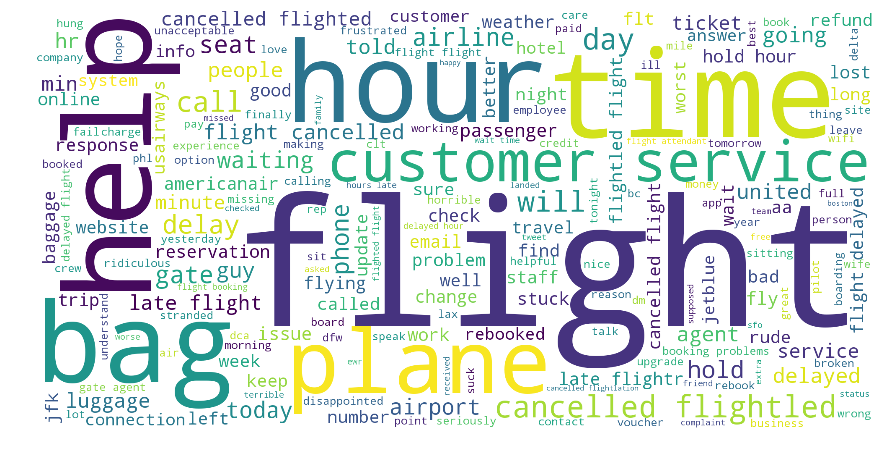

In [83]:
unique_stringg=(" ").join(neg_data['text'][:])
wordcloudd = WordCloud(width = 2000, height = 1000,background_color ='white').generate(unique_stringg)
plt.figure(figsize=(15,15))
plt.imshow(wordcloudd)
plt.axis("off")
plt.show()
plt.close()

    8- Word cloud of Negative sentiments in US_airline_tweets shows that the words 'flight','time', 'help', 'hour', and 'bag' are the most common words.
    
    9- The words 'flight', 'help', and 'times' have the most frequency in negative tweets and all tweets (based on Part 2 word cloud).
    
    10- In this model we have all of positve sentiments and it would be better the analyze all of positive sentiments and categorize them similar to what we did for model 2 and negative sentiments. This can help airlines to know their strengths. As far as the number of positive tweets are less than negative tweets, the information which is extracted from them will be valuable ( this is what I studied in BONUS part).

#### For the second model, why your model failed to predict the correct negative  reasons?

    1- 59.08% accuracy of our second logistic regression model shows that we can not predict passenger tweets with a good confidence.

Finding model 2 negative failures with confusion matrix can help us to answer the question of why our second model couldn't predict the correct negative reason:

In [84]:
model = LogisticRegression()
dfcategory = neg_data[['negative_reason', 'negreason_Category']].drop_duplicates().sort_values('negreason_Category')
idcategory = dict(dfcategory[['negreason_Category', 'negative_reason']].values)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, neg_data.index, test_size=0.3, random_state=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)

for p in dfcategory.negreason_Category:
    for a in dfcategory.negreason_Category:
        if p != a and conf_mat[a, p] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(idcategory[a], idcategory[p], conf_mat[a, p]))

'late flight' predicted as 'customer service issue' : 74 examples.
'can't tell' predicted as 'customer service issue' : 153 examples.
'cancelled flight' predicted as 'customer service issue' : 28 examples.
'lost luggage' predicted as 'customer service issue' : 29 examples.
'bad flight' predicted as 'customer service issue' : 45 examples.
'flight booking problems' predicted as 'customer service issue' : 96 examples.
'flight attendant complaints' predicted as 'customer service issue' : 54 examples.
'longlines' predicted as 'customer service issue' : 24 examples.
'damaged luggage' predicted as 'customer service issue' : 8 examples.
'customer service issue' predicted as 'late flight' : 39 examples.
'can't tell' predicted as 'late flight' : 22 examples.
'cancelled flight' predicted as 'late flight' : 25 examples.
'lost luggage' predicted as 'late flight' : 13 examples.
'bad flight' predicted as 'late flight' : 37 examples.
'flight booking problems' predicted as 'late flight' : 9 examples.
'

In [468]:
for p in dfcategory.negreason_Category:
    for a in dfcategory.negreason_Category:
        if p != a and conf_mat[a, p] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(idcategory[a], idcategory[p], conf_mat[a, p]))
            display(neg_data.loc[indices_test[(y_test == a) & (y_pred == p)]][['negative_reason', 'text']])

'late flight' predicted as 'customer service issue' : 74 examples.


,negative_reason,text
2586,late flight,changed crazy youragentshavenoclue
1210,late flight,changed entire flight plan vacation will day n...
1650,late flight,knew wait airborne respond hacks jokers nevera...
1444,late flight,rebooked disappointed wait day start vacation ...
9942,late flight,wait 60 minutes
6481,late flight,supervisor find international checkin ftl move...
796,late flight,urgency ridiculous ceo claims customer focused...
7356,late flight,dinner reservations minutes breakfast onholdwith
8490,late flight,sure guys gate occupied keep waiting
4036,late flight,rerouted bfs flight diabetic insulin change agent


'can't tell' predicted as 'customer service issue' : 153 examples.


,negative_reason,text
10194,can't tell,4 open kiosks priority 4 open main check 80100...
10915,can't tell,ashamed entire business class cabin empty class
2010,can't tell,inspected picture routine aircraft check cell ...
7756,can't tell,waiting figure unacceptable
4696,can't tell,email address send thoughts experience good fe...
9401,can't tell,andrew_wasila uncomfortable andrew youaeur sma
1165,can't tell,sure people row 7 paid premium seat overhead s...
8913,can't tell,travel 2 days ridiculous donthavehighhopes
9758,can't tell,dmd
6875,can't tell,12 hrs early send email share experience blasting


'cancelled flight' predicted as 'customer service issue' : 28 examples.


,negative_reason,text
2778,cancelled flight,vacation days relevant ritz pr night 700 losin...
9422,cancelled flight,day work stuckinmemphis texasisclosed
10415,cancelled flight,phone rep flight disappeared locator irrlcd re...
10721,cancelled flight,worst airline cancelled flight flight wait hol...
6313,cancelled flight,better find puerto rico tomorrow morning charg...
1278,cancelled flight,
1061,cancelled flight,2nd time rebooked wdelays reasons unrelate fli...
2026,cancelled flight,follow 800number agents rebooked 777 a320 ugh
4259,cancelled flight,stlbos flight today cancelled flightled online...
9342,cancelled flight,misunderstood usairways day flight change gate...


'lost luggage' predicted as 'customer service issue' : 29 examples.


,negative_reason,text
11453,lost luggage,looked told guatemala night record today cloth...
3088,lost luggage,told lostyou guys
5625,lost luggage,online thx
6233,lost luggage,waiting half hr packages wrong guys
10597,lost luggage,3days callbag pick call held ph 130 holding in...
1803,lost luggage,customer service rep confirm bag info ruined 2...
977,lost luggage,bag airport airport picking phone responding m...
10047,lost luggage,yepfiled claim heathrow yesterday promised cal...
2031,lost luggage,booked class curbside delivery 24 hours counti...
8811,lost luggage,reimbursement miles account inconvenience mone...


'bad flight' predicted as 'customer service issue' : 45 examples.


,negative_reason,text
9151,bad flight,jack_kairys site clearly explains allowed carr...
4594,bad flight,oopsno functioning bathrooms fairly full fligh...
10249,bad flight,served nastiest food yesterdayrubber chicken s...
6905,bad flight,us1799 cltsfo desert snack basket incoming tim...
3080,bad flight,post link article verifies initial complaint 2...
1856,bad flight,forced check rollaboard ua 715 plenty room ove...
9237,bad flight,service awful boston pay 25 extra dollars supp...
1434,bad flight,seat international connection seriously
9620,bad flight,bother catering dog food will eat
8435,bad flight,class snack basket catered drinks preflight dr...


'flight booking problems' predicted as 'customer service issue' : 96 examples.


,negative_reason,text
5223,flight booking problems,phone laptop
1991,flight booking problems,site errored step changing award pull reservat...
10015,flight booking problems,fly american family severe weather excuse call...
11421,flight booking problems,naomi_cooper mind aa point twitter acct form l...
2575,flight booking problems,booked flight sept best price april usa checke...
6874,flight booking problems,miles credited account open request merge acco...
10248,flight booking problems,hold 2nd time today help confirming flights ar...
6060,flight booking problems,late flight email call pittsburgh international
919,flight booking problems,makechange reservations extremely frustrated a...
4565,flight booking problems,return orig booked flt told overbookedgng diff...


'flight attendant complaints' predicted as 'customer service issue' : 54 examples.


,negative_reason,text
7036,flight attendant complaints,speak shaking rage offered hate check bag derr...
1824,flight attendant complaints,employees happy delivery terrible customer ser...
9025,flight attendant complaints,bad weather bad service
8973,flight attendant complaints,traveling 2 year appreciate holding good busin...
9250,flight attendant complaints,aa employees rude unwilling help 10000 miles r...
2916,flight attendant complaints,feedback concerns site arenaeurtmt going impro...
1927,flight attendant complaints,friend ohare flight bc proof bought 1st class ...
11475,flight attendant complaints,yvonneokaka personal response apology crews fo...
9923,flight attendant complaints,gabriela miami rude employeeworking mialga che...
9169,flight attendant complaints,team carry ons plane


'longlines' predicted as 'customer service issue' : 24 examples.


,negative_reason,text
11515,longlines,understand weather issue expect passengers wai...
4504,longlines,three flights three check agents missedflight ...
11046,longlines,spoke 30 min late flightr waiting bags load sy...
7281,longlines,50 people agent
1476,longlines,person working entire security checkpoint ewr dy
9368,longlines,57 minutes waiting silver elite pick help
2447,longlines,aware premier access lines closed terminal fee...
10319,longlines,7hours
5065,longlines,checkin system poor
7761,longlines,indy 2 ticket agents door felt bad ppl missed ...


'damaged luggage' predicted as 'customer service issue' : 8 examples.


,negative_reason,text
3943,damaged luggage,neveryamind paid 450 flight 250 bag easy busin...
6424,damaged luggage,glad happy bag traveler entrusted property ret...
5301,damaged luggage,definitely note stole
10996,damaged luggage,happen gear jeopardy steps protect customers i...
10033,damaged luggage,understand oneworld member treat customers fai...
3204,damaged luggage,airport wonaeurtmt handle problem goaeur
3948,damaged luggage,ruined wet frustrating traveling 12 hours chan...
3288,damaged luggage,serious firing happen hnl broke wheelchair loa...


'customer service issue' predicted as 'late flight' : 39 examples.


,negative_reason,text
6246,customer service issue,substitute pilots flight 69 bos fll info avail...
9119,customer service issue,iaeurtmm cool weather delays lying deceiving p...
7397,customer service issue,service phl abysmal hour runway waiting gate m...
6723,customer service issue,4 making impossibly expensive 2 change 2 fligh...
7813,customer service issue,disaster flight 3739 missed passenger count 5 ...
8747,customer service issue,usexpresspsa worth damn stuck horrible clt
3882,customer service issue,understand air delays control terrible telepho...
5381,customer service issue,flight catch 1 pm vegas praying flight
6857,customer service issue,lied bad weather dc md va stuck day shouldve owe
6739,customer service issue,assured pleasant woman gate b11 albany ny life...


'can't tell' predicted as 'late flight' : 22 examples.


,negative_reason,text
8658,can't tell,wife check flight tonight rswwebsite allowing ...
10666,can't tell,waste time airline robbed 21 hours day definit...
59,can't tell,2 scanned passengers leave plane told remove b...
2366,can't tell,three checkers walk plane overkill
10022,can't tell,dfwairport capability spread salt runway
3226,can't tell,mechanical issues delay connecting plane neede...
843,can't tell,fine plundering hardearned dollars fine
788,can't tell,woke notification flight moved 15 hrs early ba...
499,can't tell,lhr arrival lounge fail waited 20 mins shower ...
8320,can't tell,gate 35x nationalairpor nothini nothin bout yo...


'cancelled flight' predicted as 'late flight' : 25 examples.


,negative_reason,text
1868,cancelled flight,husband supposed fly rdu iad iad fra leaving 2...
7605,cancelled flight,offers provide hotel flight 19 hours
10886,cancelled flight,supposed arrive destination tonight american r...
1489,cancelled flight,hotel voucher flight delayed cancelled flightl...
7486,cancelled flight,hell will hotel stranded message mechanical is...
8693,cancelled flight,original flight suppose arrive night 200pm tod...
2545,cancelled flight,fantastic night waiting 3 hours delayed airpla...
458,cancelled flight,grounded montreal ua3659 missing connection ua...
2412,cancelled flight,haha clean plane held overnight hangar sounds ...
2056,cancelled flight,flying 930am event tomorrow pushed flight 400 ...


'lost luggage' predicted as 'late flight' : 13 examples.


,negative_reason,text
1102,lost luggage,lost sunglasses flight okc iah morning 8am tak...
7820,lost luggage,airline delayed bags 4 hours refused ship loca...
10530,lost luggage,derekc21 leave jaipur tomorrow dehli delhi nig...
3067,lost luggage,bag days late flight 3rd time couple months fr...
4981,lost luggage,yeah told flight drove drove second time
1238,lost luggage,record denver concourse prior gettin shuttle c...
7846,lost luggage,sitting runway 3 hours leave airport wo luggag...
5650,lost luggage,118 boston sitting
3805,lost luggage,lost flight knowledge sure flight ty
6144,lost luggage,best case scenario gear late flight friday ear...


'bad flight' predicted as 'late flight' : 37 examples.


,negative_reason,text
3190,bad flight,hemispheres magazine open will flight pleasant
2446,bad flight,late flight damage easily worst airline experi...
9385,bad flight,planes 2 connections 2 days
2581,bad flight,3 gate changes 30 minutes flight roanoke fligh...
10304,bad flight,planes toilet working needed gas flight 1081 l...
3659,bad flight,thinks 100 voucher spending 4 hrs plane landin...
6602,bad flight,plane hoping better luck return flight sunday
10699,bad flight,reimbursed shuttle denver 1080 diversion 6 hou...
1233,bad flight,plane sitting hanger day numerous mechanical p...
9257,bad flight,fresh food cross country flight making connect...


'flight booking problems' predicted as 'late flight' : 9 examples.


,negative_reason,text
375,flight booking problems,boarding pass austrian airlines codeshare flig...
3512,flight booking problems,redeempoints packages magically time finally 1...
4693,flight booking problems,exclusively fly sw late flightly direct flight...
3412,flight booking problems,going stuck paying hotel room denver winter cl...
4220,flight booking problems,waiting 3 hours rebook flights help
10972,flight booking problems,flt 2222 tomorrow moved 750 moved tuesday road...
4601,flight booking problems,flight booking problems late flight summer tra...
8703,flight booking problems,flight finally arrived charlotte booked luggag...
218,flight booking problems,wtf happening pdx late flight march sfo 550


'flight attendant complaints' predicted as 'late flight' : 21 examples.


,negative_reason,text
1698,flight attendant complaints,well missed mark snit minute stepped counter
9113,flight attendant complaints,staff flights approproately entire flight dela...
10275,flight attendant complaints,understand tug gate ground crew break unaccept...
4304,flight attendant complaints,staff kind flight delay luggage disappointing
2286,flight attendant complaints,ground crews surprised flights arrive beingsuc...
578,flight attendant complaints,flight delayed time 20 min spare delayed sure
1474,flight attendant complaints,boarding time ua3882 crewe
1699,flight attendant complaints,compensates delays caused fact flight attendants
7947,flight attendant complaints,stress awful agent flight 5283 knew 11 ppl del...
731,flight attendant complaints,20 people board planehow big miscalculation


'longlines' predicted as 'late flight' : 24 examples.


,negative_reason,text
2553,longlines,freezing gate bridgewaitingforbagsunitedewr
4969,longlines,told couldnaeurtmt hours ago plane left stuck ...
793,longlines,denver rebook weather issues better
1762,longlines,told board wait emails telling delays
11052,longlines,sitting plane 25hrs gate computer sys issue po...
9541,longlines,24951170 rno departure 1229 225 wconnection df...
9464,longlines,rampers gate b40 dfw waiting marshaled
8002,longlines,hell terrible gate agents three hour wait gate
5794,longlines,runway ready waiting port authority remove sno...
7641,longlines,planes sitting going usairwaysfail


'customer service issue' predicted as 'can't tell' : 60 examples.


,negative_reason,text
4658,customer service issue,noticed offer list boarding a60 programs popular
2207,customer service issue,released travel advisory iad tomorrow
8218,customer service issue,literally worst flying experience life flown lot
9009,customer service issue,noltnancy will bewhat issucks fail
7906,customer service issue,hotel food suggestion options making metro cit...
10966,customer service issue,seriously hate americanair accommodate incleme...
7312,customer service issue,making folks gate c29 a18 b11 explanation cart...
9229,customer service issue,takes month
6274,customer service issue,free movies dunkin donuts coffee safety hazard...
2405,customer service issue,aware airbus fleet sucks fly c130 full rubber ...


'late flight' predicted as 'can't tell' : 33 examples.


,negative_reason,text
2709,late flight,thought detail extravaganza dobetter
10896,late flight,aa45 jfk las
4030,late flight,baltimore delta laps laughing ridiculous
3330,late flight,hate united family thursday
10466,late flight,deplaned 3rd fucking time fuck aa
231,late flight,spending birthday night daldca
6414,late flight,whoa tag tweet flight 105 jfk chicago brother ...
7556,late flight,bad day train trip appealing
10524,late flight,good info communicated point silence hours sat...
964,late flight,shared pilot passengers


'cancelled flight' predicted as 'can't tell' : 10 examples.


,negative_reason,text
8362,cancelled flight,needed destination lunchtime today flight lear...
1447,cancelled flight,assume 300 people united worse plane crew fly
8977,cancelled flight,half inch snow charlotte overwhelming
5164,cancelled flight,challemann flying lga dead winter jvstatus ewr...
6942,cancelled flight,changed flight 6 times 1 trip bumped delta gre...
4945,cancelled flight,disheartening experience familyand lot taxi mo...
7895,cancelled flight,alternate options allready fulleven hotel vouc...
3842,cancelled flight,flt canx minute weather flew weatherless united
1339,cancelled flight,company unfair stay 24 traveling
6681,cancelled flight,paid fees hotel food changes flown reliable ai...


'lost luggage' predicted as 'can't tell' : 12 examples.


,negative_reason,text
3116,lost luggage,monday evening
2114,lost luggage,luggages group 20 luggages lost
3823,lost luggage,understand consistent consistent years country
1139,lost luggage,airlines kidding bagage lost morning ny washin...
6145,lost luggage,weekend attend training camp sending gear fl t...
4483,lost luggage,sure read southwest liable incident fault sw lost
6764,lost luggage,sadly help meeting work today presentation maj...
3713,lost luggage,yeah hopefully today frustrated tweeting
1287,lost luggage,heard united erieairport
7685,lost luggage,worse experience clt dc oversold 20 lost carry...


'bad flight' predicted as 'can't tell' : 36 examples.


,negative_reason,text
838,bad flight,cool
7727,bad flight,family friends colleagues will fly usair bad w...
9281,bad flight,worry ill sending letter expect compensation f...
1880,bad flight,ruined day start trip sfo gig legs changed los...
2850,bad flight,emails talking business people expect airline ...
4574,bad flight,enforcing boarding procedure
3464,bad flight,wife group prev flight bumped reason kids group
9594,bad flight,living dfw hub hate fly jfk ireland
5590,bad flight,will keep tweeting ceo answers personally apol...
9286,bad flight,narrowly standbylots snags trip


'flight booking problems' predicted as 'can't tell' : 15 examples.


,negative_reason,text
370,flight booking problems,guys book planes concern ill travel moving for...
2880,flight booking problems,final destination booked united quantas united...
5107,flight booking problems,shot find flight arrives business san thu
2184,flight booking problems,dear ted care mileage card pay lot bye bye united
5330,flight booking problems,transferring trueblue points family pooling me...
6146,flight booking problems,making stay jfk 2 late flightr rebook making pay
4398,flight booking problems,states playing hunt destinationdragons tickets...
9245,flight booking problems,pay 200 reactivate points flights worth 200
10442,flight booking problems,friend legally required chaperone school trip
11014,flight booking problems,spent 600 flight united 382 mileage program sucks


'flight attendant complaints' predicted as 'can't tell' : 12 examples.


,negative_reason,text
6405,flight attendant complaints,asked wanted tea teanot coffee gold united cof...
4874,flight attendant complaints,file formal complaint disgruntled employee lag...
1160,flight attendant complaints,wanted point united crew sympathetic questions...
5418,flight attendant complaints,fleets fleek
2137,flight attendant complaints,passengers seated crew ready wheresthepilot fl...
9918,flight attendant complaints,advised gas pilot flight bad action
5679,flight attendant complaints,1691 jfk info answers boarded plane team awkwa...
2652,flight attendant complaints,concerned close club paid alot 10 flight 1115p...
2290,flight attendant complaints,issue express sfo positive note mainline ps en...
4830,flight attendant complaints,straying going americanair learned lesson atte...


'customer service issue' predicted as 'cancelled flight' : 30 examples.


,negative_reason,text
10426,customer service issue,speak agent 24hrs cancelled flightled flight r...
9380,customer service issue,1hr 46 min cost flight change 788 188 2hrs ago...
10035,customer service issue,cancelled flightled ticket months refund waiting
11089,customer service issue,rebook flight cancelled flightlation nightmare...
8094,customer service issue,flight takes cancelled flight issue pay inacce...
4222,customer service issue,called united solved flight cancelled flightla...
7847,customer service issue,hold 2 hours reschedule cancelled flightled fl...
10665,customer service issue,best talk agent reschedule cancelled flighted ...
857,customer service issue,contacted directly phone service laissez faire...
4271,customer service issue,hold 3 hrs waiting talk pulse cancelled flight...


'late flight' predicted as 'cancelled flight' : 7 examples.


,negative_reason,text
10660,late flight,hey call flight rescheduled providing hotel
11350,late flight,hours late flightr waiting callback reschedule...
1454,late flight,screwing flights cae bother flights leave time...
10633,late flight,rubbish social media air hours late flight bet...
7373,late flight,flight missed mech issue food voucher transpor...
2426,late flight,cancelled flight flight
10229,late flight,249 ewr dfw stopping bna refuel 4 bad weather ...


'flight booking problems' predicted as 'cancelled flight' : 8 examples.


,negative_reason,text
10317,flight booking problems,will cancelled flight flights refund wednesday...
1630,flight booking problems,bought ticket price published mistake email in...
10719,flight booking problems,priority member wonder treat plebes rewards ca...
7722,flight booking problems,expedia 7 hours friend rebook trip korea usair...
3300,flight booking problems,gg8929 cancelled flight tickets thousands peop...
9253,flight booking problems,1hr 46 min cost flight change 788 188 2hrs ago...
10190,flight booking problems,cancelled flight trip 25 future trip voucher 2...
7914,flight booking problems,garbage book reward flight cancelled flighted ...


'customer service issue' predicted as 'lost luggage' : 10 examples.


,negative_reason,text
2167,customer service issue,file claim agents speak supervisor claim numbe...
112,customer service issue,normal receive reply central baggage baggageis...
8992,customer service issue,jfk baggage office paper hotel vouchers thisli...
514,customer service issue,outbound 2 bags 70 lbs bags returning 1 bag 50...
10107,customer service issue,baggage handlers calling dfw today luggage onb...
10081,customer service issue,employee gate 45 jfk telling people bag fit ch...
9753,customer service issue,understand hoping rectify advance call auh che...
6964,customer service issue,week place bag size check itfits
11463,customer service issue,sweetmel weather bad folks extra hard communic...
1546,customer service issue,frustrated conversations united speak spanish ...


'late flight' predicted as 'lost luggage' : 8 examples.


,negative_reason,text
11317,late flight,late flight phoenix ticks arrived chicago held...
3999,late flight,gotta record 4 hrs air 11 hrs waiting 0 bags d...
5038,late flight,sat plane 3 hours waiting engine fixed luggage...
2638,late flight,transfer bags
1745,late flight,flight takeoff time late flight wait bag bagga...
11327,late flight,refused unload luggage stuck freezing weather ...
4929,late flight,enjoying sitting bwi door wide open ac baggage...
11358,late flight,aftr 10 hrs bng held hstg mia bc aa refsd med ...


'can't tell' predicted as 'lost luggage' : 9 examples.


,negative_reason,text
842,can't tell,hopefully baggage fees will waived tomorrow fl...
6607,can't tell,pay extra space forced backpack seat bag fligh...
2259,can't tell,100 sure ticket included checked bag charge ex...
5919,can't tell,quick person traveling mosaic green tag sense ...
2785,can't tell,will flying unitedairlines 285 checked bags 50...
4725,can't tell,hates guitar players chgd oversize extra bag a...
4904,can't tell,fly today trip harder pay checked bag devotedy...
3601,can't tell,bags flutter charge travelers change dates ful...
4430,can't tell,start charging carryon luggage carryonbagsslow...


'flight attendant complaints' predicted as 'lost luggage' : 9 examples.


,negative_reason,text
2792,flight attendant complaints,spends 20 minutes beating lady bag fees random...
5743,flight attendant complaints,applying tag left bag ground loading conveyer ...
4692,flight attendant complaints,express express bag drop phoenix sky harbor
7921,flight attendant complaints,top check bag wait 30 min bag baggage claim wa...
3184,flight attendant complaints,golf bag top cover staffers check type cover w...
1137,flight attendant complaints,otis baggage claim bay 8 happy pissed
8322,flight attendant complaints,gate agent clt forced check bag z1 proceeded a...
2620,flight attendant complaints,wasting time baggage claim dfw ground crew che...
1286,flight attendant complaints,poor cabin luggage service ua1266 bos forced c...


'damaged luggage' predicted as 'lost luggage' : 14 examples.


,negative_reason,text
297,damaged luggage,spend 5 hours worrying items carryon brokensto...
101,damaged luggage,policy destroyed luggage
6420,damaged luggage,gears grinding jfk baggage office told bring b...
9774,damaged luggage,submitted damaged bag complaint onlineis goodc...
9448,damaged luggage,extremely upset baggage handlers decide luggag...
1174,damaged luggage,realize bag contents wet hotel suitshirts dry ...
593,damaged luggage,received luggage looked left snow arrived 50 p...
8799,damaged luggage,drvrugby team luggage wet partly damaged happy...
8878,damaged luggage,2 times checked bags severally damaged answers...
7640,damaged luggage,luggage contents destroyed outbound trip weeki...


'can't tell' predicted as 'bad flight' : 6 examples.


,negative_reason,text
3606,can't tell,thoughts entire plane
4557,can't tell,charge moving full flight earlier flight seats...
5579,can't tell,wellmy paid tickets assigned seats essentially...
3684,can't tell,feeling frustrated bought wifi onboard load email
6277,can't tell,lack coffee 730am flight told forgot load coff...
1353,can't tell,500 voucher offered miscounting seats plane fly


'customer service issue' predicted as 'flight booking problems' : 12 examples.


,negative_reason,text
7137,customer service issue,jhughes1025 grrrrrrrr book flight calling
11362,customer service issue,rebooked tomorrow failed dl flight today despi...
109,customer service issue,website
1095,customer service issue,advertise flight website book spent 2 hours un...
11380,customer service issue,booked wrong flight pe desk wait 2 hours
6339,customer service issue,helpful dissatisfied flight booking problems t...
6876,customer service issue,open credit card earn 44000 miles credit miles...
6679,customer service issue,glitches website flight booking problems trave...
5939,customer service issue,love airlinehate website book 2 tickets 1 mile...
3535,customer service issue,points buy rapid reward shopping site


    2- Prediction failures show that "Can't tell" category of negative sentiments have the most number of errors in prediction. There is 153 examples that "Can't tell" predicted as "customer service issue".
    
    3- The error which is occured for predicting "customer service issue" category instead of "Can't tell" can have many reasons. As far as customer service constitute large number of procedures and passengers have to deal with that from reserving the ticket until end of the trip, it would be hard to categorize it. Thus, this can have a considerable role in the error of model 2. The other reason is that all of other 9 categories are specifically specified except "Can't Tell" category. This can lead to error in categorizing data. For example, there are many examples that have "Can't Tell" category which is chosen for tweets don't seem to be true and it would be better to categorize that data to "customer service issue". Two examples of this typre of error are shown in the following tweets.

In [85]:
neg_data['text'][8497]

'expensive change fees airlines chose screw stranded help'

In [86]:
neg_data['text'][5291]

'customer service wife setup family account join mine year help'

    4- There are some tweets that all words in them considered as stop words. For example, 6983th tweet is: "me too!"  which is considered as "can't tell" but after removing stopwords, there will be no words in it and our model predicted it as "customer service issue". Thus, it would be better to have one category for tweets without any special words. In this way, we can improve the accuracy of our model ( this is what I did in BONUS part).
    5- Another way that can help us for categorizing our data is to combine our list of ten categories. This can help airline managers to find out the main area which passengers are not satisfied with their flight. My suggestion is to categorize all negative data to 'Pre-Flight', 'During-Flight', 'Post-Flight', and 'Can't Tell'. In BONUS section, I will investigate this new method of categorization on our second model.

# BONUS

In this section, alternative classification methods are introduced and their performance will be evaluated. In this assignment, I will compare the result of RandomForestClassifier [3], LogisticRegression, LinearSVC [4], and MultinomialNB [5].

**RandomForestClassifier**:
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

**LinearSVC**:
The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is. This makes this specific algorithm rather suitable for our uses, though you can use this for many situations. Let's get started.

**MultinomialNB**:
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [87]:
models = [RandomForestClassifier(n_estimators=300, max_depth=4, random_state=10),LogisticRegression(random_state=10),LinearSVC(),MultinomialNB()]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.575292
LogisticRegression        0.594683
MultinomialNB             0.507734
RandomForestClassifier    0.325559
Name: accuracy, dtype: float64

This result shows that Linear Regression can provide the best fit to our data with higher accuracy.

-- --

In [88]:
pos_data =df.iloc[:, [ 5,6]][df.isna().any(axis=1)]
pos_data2=pos_data["Airline's name"].value_counts()
pos_data2

southwestair     570
jetblue          544
united           492
americanair      336
usairways        269
virginamerica    152
Name: Airline's name, dtype: int64

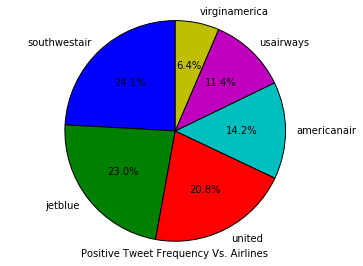

In [89]:
fig6, ax6 = plt.subplots()
ax6.pie(pos_data2, explode=None, labels=pos_data2.index, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax6.axis('equal')
plt.xlabel('Positive Tweet Frequency Vs. Airlines')
plt.show()

In [90]:
neg_data2 =df.iloc[:, [ 5,6]].dropna()
neg_data2=neg_data2["Airline's name"].value_counts()
neg_data2

united           3124
usairways        2532
americanair      2296
southwestair     1757
jetblue          1497
virginamerica     333
deltaassist         2
Name: Airline's name, dtype: int64

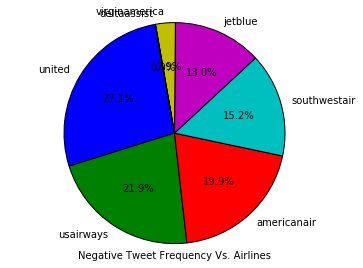

In [91]:
fig8, ax8 = plt.subplots()
ax8.pie(neg_data2, explode=None, labels=neg_data2.index, autopct='%1.1f%%',
        shadow=False, startangle=100)
ax8.axis('equal')
plt.xlabel('Negative Tweet Frequency Vs. Airlines')
plt.show()

Making comparison between these 2 pie charts we will find out that only  three airlines have higher positive tweets than negative tweets. These airlines with the order of highest customer satissfaction are: JetBlue, SouthWestAir, VirginAmerica. 

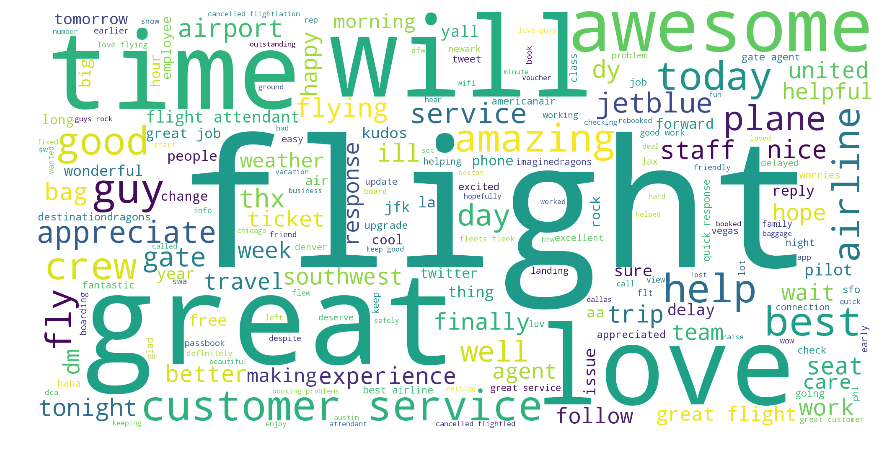

In [92]:
unique_stringgg=(" ").join(pos_data['text'][:])
wordcloudd = WordCloud(width = 2000, height = 1000,background_color ='white').generate(unique_stringgg)
plt.figure(figsize=(15,15))
plt.imshow(wordcloudd)
plt.axis("off")
plt.show()
plt.close()

This Word cloud for positive tweets can show what makes passengers satissfied in their travel. Based on this word cloud, 'customer service', 'crew', 'seat', 'time', and 'flight' can be very effective for passengers to become satissfied of airline service.

______________________

In this section, I want to test my hypothesis on Part 5 about omitting tweets which have less than 2 words after removing stopwords.

In [93]:
neg_data=neg_data.reset_index(drop=True)
temp34=[]
for u in range(0,len(neg_data)):
    temp34.append(neg_data['text'][u].split())
neg_data['text']=temp34

ix=neg_data["text"][:].apply(len) < 2
neg_data2=neg_data.loc[~ix]
neg_data2['text'] = neg_data2['text'].str.join(" ")

In [94]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=4,ngram_range=(1, 1))
features = tfidf.fit_transform(neg_data2.text).toarray()
labels = neg_data2.negreason_Category

X_train, X_test, y_train, y_test = train_test_split(neg_data2['text'],neg_data2['negative_reason'],test_size = 0.3, random_state = 10)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [LogisticRegression(random_state=10)]
cv = 10
cv_df = pd.DataFrame(index=range(cv * len(models)))
entries = []
for modelss in models:
    model_name = modelss.__class__.__name__
    acc = cross_val_score(modelss, features, labels, scoring='accuracy', cv=cv)
    for fold_idx, accuracy in enumerate(acc):
        entries.append((model_name, fold_idx, acc))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

print("Model Accuracy is: {0:.4f}".format(accuracy.mean()))

Model Accuracy is: 0.5938


This accuracy shows that with deleting tweets which have less than two words after removeing stopwords, the accuracy of the second model will improve 0.3%.

--------------------------------------------------------------------------


In this section, I will investigate the effect of providing new categorization for negative reasons of tweets. Based on what we discussed in part 5, it would be easier for Airline managers to analyze customer satissfaction during four stages of "Pre_Flight", "During-Flight", "Post-Flight", and "Can't Tell". I regategorized the negative data in this way to find out the accuracy of the second model with this new way of data categorization.

In [95]:
neg_data['negreason_Category'] = neg_data['negative_reason'].map(lambda x: 1 if x=='customer service issue' else (2 if x=='late flight' else (0 if x=="can't tell" else (2 if x=='cancelled flight' else (3 if x=='lost luggage' else (2 if x=='bad flight' else (1 if x=='flight booking problems' else (2 if x=='flight attendant complaints' else (1 if x=='longlines' else (3 if x=='damaged luggage' else 'NAN'))))))))))
neg_data['text'] = neg_data['text'].str.join(" ")

In [96]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=4,ngram_range=(1, 1))
features = tfidf.fit_transform(neg_data.text).toarray()
labels = neg_data.negreason_Category

X_train, X_test, y_train, y_test = train_test_split(neg_data['text'],neg_data['negative_reason'],test_size = 0.3, random_state = 10)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [LogisticRegression(random_state=10)]
cv = 10
cv_df = pd.DataFrame(index=range(cv * len(models)))
entries = []
for modelss in models:
    model_name = modelss.__class__.__name__
    acc = cross_val_score(modelss, features, labels, scoring='accuracy', cv=cv)
    for fold_idx, accuracy in enumerate(acc):
        entries.append((model_name, fold_idx, acc))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

print("Model Accuracy is: {0:.4f}".format(accuracy.mean()))

Model Accuracy is: 0.6976


This accuracy shows that with combining 10 groups of negative tweets to 4 groups of "Can't Tell", "Pre-Flight", "During-Flight", and "Post-Flight" the accuracy of the second model will improve 10.68%. This considerable change can show that our previous categorization was not robust enough and we will lost our model accuracy with this kind of categorization.

#### References:

    [1] https://medium.freecodecamp.org/how-to-process-textual-data-using-tf-idf-in-python-cd2bbc0a94a3
    [2] Table 3, https://www.bts.gov/newsroom/corrected-bts-statistics-release-2016-traffic-data-us-airlines-and-foreign-airlines-us
    [3] https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1
    [4] https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/
    [5] https://kite.com/python/docs/sklearn.naive_bayes.MultinomialNB